In [21]:
%%writefile gen_cross.py
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import numpy as np
import os
import re
import tensorflow as tf
import tensorflow.contrib.slim as slim
import time
import traceback
import matplotlib.pyplot as plt
from shutil import copyfile
import random

vh = vw = 128
batch_size = 32

dset = "/home/paperspace/zen/6dof/6dof_data/cars_with_keypoints"
output_dir = "test_car/"

with open(os.path.join(dset, "test.txt"), "r") as f:
    testset = [x.strip() for x in f.readlines()]

files = os.listdir(dset)
filenames = []
for f in files:
    sp = os.path.splitext(f)
    if sp[1] == ".tfrecord" and sp[0] in testset:
        filenames.append(os.path.join(dset, f))

print(filenames)

def parser_test(serialized_example):
    """Parses a single tf.Example into image and label tensors."""
    fs = tf.parse_single_example(
        serialized_example,
        features={
            "img0": tf.FixedLenFeature([], tf.string),
            "img1": tf.FixedLenFeature([], tf.string),
            "mv0": tf.FixedLenFeature([16], tf.float32),
            "mvi0": tf.FixedLenFeature([16], tf.float32),
            "mv1": tf.FixedLenFeature([16], tf.float32),
            "mvi1": tf.FixedLenFeature([16], tf.float32),
        })

    return fs


if not os.path.exists(output_dir):
        os.mkdir(output_dir)
record_name = output_dir + '{0:04}'.format(0) + ".tfrecord"

def bytes_feature(values):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[values]))

def write_pair(tfrecord_writer, data_1, data_2):
    st0 = data_1["img0"][0]
    st1 = data_2["img0"][0]
    
    example1 = tf.train.Example(features=tf.train.Features(feature={
        'img0': bytes_feature(st0),
        'img1': bytes_feature(st1),
        'mv0': tf.train.Feature(
            float_list=tf.train.FloatList(value=data_1["mv0"][0])),
        'mvi0': tf.train.Feature(
            float_list=tf.train.FloatList(value=data_1["mvi0"][0])),
        'mv1': tf.train.Feature(
            float_list=tf.train.FloatList(value=data_2["mv0"][0])),
        'mvi1': tf.train.Feature(
            float_list=tf.train.FloatList(value=data_2["mvi0"][0])),
    }))
    
    st0 = data_1["img1"][0]
    st1 = data_2["img1"][0]

    example2 = tf.train.Example(features=tf.train.Features(feature={
        'img0': bytes_feature(st0),
        'img1': bytes_feature(st1),
        'mv0': tf.train.Feature(
            float_list=tf.train.FloatList(value=data_1["mv1"][0])),
        'mvi0': tf.train.Feature(
            float_list=tf.train.FloatList(value=data_1["mvi1"][0])),
        'mv1': tf.train.Feature(
            float_list=tf.train.FloatList(value=data_2["mv1"][0])),
        'mvi1': tf.train.Feature(
            float_list=tf.train.FloatList(value=data_2["mvi1"][0])),
    }))
    if random.random() > 0.5:
        tfrecord_writer.write(example1.SerializeToString())
    else:
        tfrecord_writer.write(example2.SerializeToString())
    
    
data = []
for i in range(len(filenames)):
    print(filenames[i])
    dataset = tf.data.TFRecordDataset([filenames[i]])
    dataset = dataset.map(parser_test, num_parallel_calls=4)
    dataset = dataset.repeat(1).batch(1)
    dataset = dataset.prefetch(buffer_size=256)
    gen = dataset.make_one_shot_iterator().get_next()
    with tf.Session() as sess:
        while True:
            try:
                val = sess.run(gen)
                data.append(val)
            except:
                break
                
data = np.array(data)

record_name = "0065.tfrecord"
def write_tf(data):
    for record_idx in range(0, int(len(data)/4000)):
        record_name = output_dir + filenames[record_idx].split("/")[-1]
        print(record_name)
        with tf.python_io.TFRecordWriter(record_name) as tfrecord_writer:
            with tf.Graph().as_default():
                for i in range(40):
                    subset = np.ones((len(data)), dtype=bool)
                    subset[i:i+100] = False
                    data_pair_1 = random.sample(list(data[subset]), 100)
                    np.invert(subset)
                    data_pair_2 = data[subset]
                    for idx in range(100):
                        data_1 = data_pair_1[idx]
                        data_2 = data_pair_2[idx]
                        write_pair(tfrecord_writer, data_1, data_2)

write_tf(data)



f_test = open(output_dir + "test.txt", "w+")
for i in testset:
    f_test.write(i + "\n")
f_valid = open(output_dir + "dev.txt", "w+")
f_test.close()
f_valid.close()

copyfile(dset + "/projection.txt", output_dir + "projection.txt")


Writing gen_cross.py


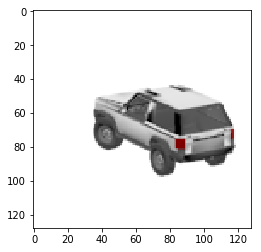

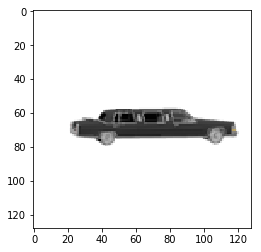

In [22]:
i = "test_car/0065.tfrecord"
dataset = tf.data.TFRecordDataset([i])
dataset = dataset.map(parser, num_parallel_calls=4)
dataset = dataset.repeat(1).batch(1)
dataset = dataset.prefetch(buffer_size=256)
gen = dataset.make_one_shot_iterator().get_next()
data = []
with tf.Session() as sess:
    val = sess.run(gen)
    plt.imshow(val['img0'][0])
    plt.show()
    plt.imshow(val['img1'][0])
    plt.show()

test_car/0065.tfrecord
test_car/0145.tfrecord
test_car/0170.tfrecord
test_car/0063.tfrecord
test_car/0019.tfrecord
test_car/0049.tfrecord
test_car/0018.tfrecord
test_car/0036.tfrecord
test_car/0079.tfrecord
test_car/0141.tfrecord
test_car/0176.tfrecord
test_car/0061.tfrecord
test_car/0093.tfrecord
test_car/0099.tfrecord
test_car/0179.tfrecord
test_car/0144.tfrecord
test_car/0029.tfrecord
test_car/0142.tfrecord
